In [9]:
import sys
from pathlib import Path

_BASE_DIR = Path().resolve().parent.parent
print("(!) Make sure this dir is project directory: ", _BASE_DIR)
sys.path.append(str(_BASE_DIR))

from utils.settings import get_in_out_dirs

_LAB_NAME = "lab8"

INPUT_DIR, OUTPUT_DIR = get_in_out_dirs(base_name=_LAB_NAME)

DATA_DIR = INPUT_DIR / "data"
DATA_DIR.mkdir(parents=True, exist_ok=True)

(!) Make sure this dir is project directory:  /home/ars/Desktop/university/bsu-nn


# Лабораторная 8

## Задание 1

Используйте обученные сверточные нейронные сети для распознавания своих объектов и рукописных цифр.

Примеры изображений цифр доступны в папке Пример для темы 6.


***Сделано в прошлой лабе***

## Задание 2

Используйте предварительно обученную сеть VGG16 в Keras для распознавания своего изображения.

***Сделано в прошлой лабе***

## Задание 3:

Используйте предварительно обученную сеть ResNet50 в Keras для распознавания своего изображения.

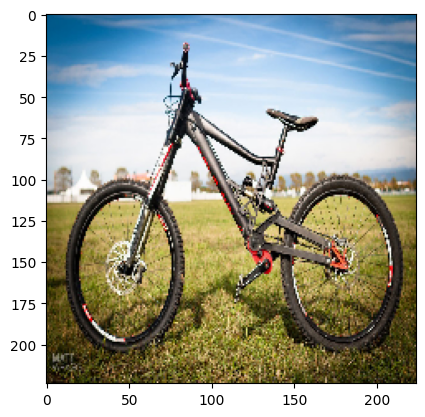

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Топ-5 предсказаний:
1: mountain_bike (0.94)
2: crash_helmet (0.02)
3: disk_brake (0.01)
4: alp (0.01)
5: water_bottle (0.00)


In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Загрузка предобученной модели ResNet50
model = ResNet50(weights='imagenet')  # Загружаем модель с весами, обученными на ImageNet

# Шаг 2: Загрузка и подготовка изображения
file_path = DATA_DIR / "велосипед.jpg" 
img = load_img(file_path, target_size=(224, 224)) 
plt.imshow(img)  
plt.show()

img = img_to_array(img)
img = np.expand_dims(img, axis=0) 
img = preprocess_input(img)  

# Шаг 3: Предсказание
predictions = model.predict(img)  
decoded_predictions = decode_predictions(predictions, top=5)[0] 

# Шаг 4: Вывод результатов
print("Топ-5 предсказаний:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")
